<a href="https://colab.research.google.com/github/Diediemeow/2034-logica-programacion-1/blob/ProyectoInicial/PharmaProyect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avance de proyecto realizado por:

*   Guadalupe Reyes Trujillo
*   Maria Fernanda Barrón Guzmán

*   Olga Magali Vazquez Marin
*   Ana Cristina Cuevas Garcia





#**Modelo indicativo de venta de farmacos que nos mencione qué productos son mas vendidos durante el paso de los años**


## **Estimados de Locacion y Variabilidad**

En esta primera sección se tratan de tener los estimados de locación y variabilidad en nuestros datos los cuales nos dan una vista de lo que tenemos los cuales vammos a requerir para trabajar análisis más precisos de nuestros datos más adelante.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import numpy as np
from scipy.stats import trim_mean
from scipy.stats import skew, kurtosis

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto_BEDU/salesmonthly.csv')

Las variables a trabajar son las siguientes (están medidas por volúmenes):


*   M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances
*   M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives


*   N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives

*   N02BE/B - Other analgesics and antipyretics, Pyrazolones and Anilides
*   N05B - Psycholeptics drugs, Anxiolytic drugs


*   N05C - Psycholeptics drugs, Hypnotics and sedatives drugs



*   R03 - Drugs for obstructive airway diseases
*   R06 - Antihistamines for systemic use






In [ ]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


Aquí nos aseguramos de saber qué tipo de datos estamos manejando en el dataset, y nos damos cuenta que todos son tipo float a excepción de las fechas que son tipo object.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   70 non-null     object 
 1   M01AB   70 non-null     float64
 2   M01AE   70 non-null     float64
 3   N02BA   70 non-null     float64
 4   N02BE   70 non-null     float64
 5   N05B    70 non-null     float64
 6   N05C    70 non-null     float64
 7   R03     70 non-null     float64
 8   R06     70 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.0+ KB


In [ ]:
fechas = pd.to_datetime(df['datum'])

In [ ]:
df['datum'] = fechas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   datum   70 non-null     datetime64[ns]
 1   M01AB   70 non-null     float64       
 2   M01AE   70 non-null     float64       
 3   N02BA   70 non-null     float64       
 4   N02BE   70 non-null     float64       
 5   N05B    70 non-null     float64       
 6   N05C    70 non-null     float64       
 7   R03     70 non-null     float64       
 8   R06     70 non-null     float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 5.0 KB


In [ ]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


Promedio de las columnas con datos númericos donde prácticamente son casí todas las columnas porque no cocntamos con variables categorícas

In [ ]:
#Función para el promedio
def promedio(serie):
  suma = sum(serie)
  elementos = serie.count()
  return suma  / elementos

In [ ]:
#Promedio por columna
prom_M01AB = promedio(df['M01AB'])
prom_M01AE = promedio(df['M01AE'])
prom_N02BA = promedio(df['N02BA'])
prom_N02BE = promedio(df['N02BE'])
prom_N05B = promedio(df['N05B'])
prom_N05C = promedio(df['N05C'])
prom_R03 = promedio(df['R03'])
prom_R06 = promedio(df['R06'])

In [ ]:
#Impresión del promedio
print(prom_M01AB)
print(prom_M01AE)
print(prom_N02BA)
print(prom_N02BE)
print(prom_N05B)
print(prom_N05C)
print(prom_R03)
print(prom_R06)

149.99200000000005
116.51428571428576
115.0208428571428
892.5420714285715
262.11857142857144
17.84285714285714
167.675
86.66257142857144


Mediana de las columnas con datos númerico, esto para tener en cuenta el dato que se ubica justo en el centro de cada una de las columnas

In [ ]:
#Mediana por columna
med_M01AB = df['M01AB'].median()
med_M01AE = df['M01AE'].median()
med_N02BA = df['N02BA'].median()
med_N02BE = df['N02BE'].median()
med_N05B = df['N05B'].median()
med_N05C = df['N05C'].median()
med_R03 = df['R03'].median()
med_R06 = df['R06'].median()

In [ ]:
#Impresión de la mediana
print(med_M01AB)
print(med_M01AE)
print(med_N02BA)
print(med_N02BE)
print(med_N05B)
print(med_N05C)
print(med_R03)
print(med_R06)

154.63500000000005
114.84000000000002
117.225
865.8245000000002
250.3
18.0
160.0
74.1


Media truncada de las columnas, aquí se quitaron el 10% de los datos siendo 5% a la derecha y 5% a la izquierda, para posteriormente truncar el promedio de los datos restantes sin ese 10%

In [ ]:
med_truncada_M01AB = trim_mean(df['M01AB'], proportiontocut=0.1)
med_truncada_M01AE = trim_mean(df['M01AE'], proportiontocut=0.1)
med_truncada_N02BA = trim_mean(df['N02BA'], proportiontocut=0.1)
med_truncada_N02BE = trim_mean(df['N02BE'], proportiontocut=0.1)
med_truncada_N05B = trim_mean(df['N05B'], proportiontocut=0.1)
med_truncada_N05C = trim_mean(df['N05C'], proportiontocut=0.1)
med_truncada_R03 = trim_mean(df['R03'], proportiontocut=0.1)
med_truncada_R06 = trim_mean(df['R06'], proportiontocut=0.1)

In [ ]:
print(med_truncada_M01AB)
print(med_truncada_M01AE)
print(med_truncada_N02BA)
print(med_truncada_N02BE)
print(med_truncada_N05B)
print(med_truncada_N05C)
print(med_truncada_R03)
print(med_truncada_R06)

152.88125000000005
116.09146428571432
115.6814107142857
867.5638214285716
257.0232142857143
17.375
163.21875
82.83285714285714


Desviación estandar de las columnas, esto es de suma importancia ya que nos indica una variación de los datos sobre el promedio, la cual más adelante vamos a poder observar gráficamente

In [ ]:
#Desviación estandar por columna
std_M01AB = df['M01AB'].std()
std_M01AE = df['M01AE'].std()
std_N02BA = df['N02BA'].std()
std_N02BE = df['N02BE'].std()
std_N05B = df['N05B'].std()
std_N05C = df['N05C'].std()
std_R03 = df['R03'].std()
std_R06 = df['R06'].std()

In [ ]:
#Impresión de la desviación estandar
print(std_M01AB)
print(std_M01AE)
print(std_N02BA)
print(std_N02BE)
print(std_N05B)
print(std_N05C)
print(std_R03)
print(std_R06)

31.48532534188045
27.88933638723022
31.24589865057804
338.84390820494855
85.06093006790228
8.481242242696293
81.76797934186814
45.85933551809806


Percentiles 25 y 75

In [ ]:
#Percentil 25
percentil_25_M01AB = df['M01AB'].quantile(0.25)
percentil_25_M01AE = df['M01AE'].quantile(0.25)
percentil_25_N02BA = df['N02BA'].quantile(0.25)
percentil_25_N02BE = df['N02BE'].quantile(0.25)
percentil_25_N05B = df['N05B'].quantile(0.25)
percentil_25_N05C = df['N05C'].quantile(0.25)
percentil_25_R03 = df['R03'].quantile(0.25)
percentil_25_R06 = df['R06'].quantile(0.25)

In [ ]:
#Impresión del percentil 25
print(percentil_25_M01AB)
print(percentil_25_M01AE)
print(percentil_25_N02BA)
print(percentil_25_N02BE)
print(percentil_25_N05B)
print(percentil_25_N05C)
print(percentil_25_R03)
print(percentil_25_R06)

137.49
103.51825
94.375
648.1875000000001
223.75
12.0
112.0
49.875


In [ ]:
#Percentil 75
percentil_75_M01AB = df['M01AB'].quantile(0.75)
percentil_75_M01AE = df['M01AE'].quantile(0.75)
percentil_75_N02BA = df['N02BA'].quantile(0.75)
percentil_75_N02BE = df['N02BE'].quantile(0.75)
percentil_75_N05B = df['N05B'].quantile(0.75)
percentil_75_N05C = df['N05C'].quantile(0.75)
percentil_75_R03 = df['R03'].quantile(0.75)
percentil_75_R06 = df['R06'].quantile(0.75)

In [ ]:
#Impresión del percentil 75
print(percentil_75_M01AB)
print(percentil_75_M01AE)
print(percentil_75_N02BA)
print(percentil_75_N02BE)
print(percentil_75_N05B)
print(percentil_75_N05C)
print(percentil_75_R03)
print(percentil_75_R06)

169.00000000000003
128.35975
133.83750000000003
1061.5800000000004
293.65
23.0
218.25
119.8075


Rango

Aquí no se concluye nada sobre los datos, simplemente se saco un rango con el promedio y una desviación estandar para tener un limite inferior y superior de dicho rango

In [ ]:
#Columna M01AB
limite_inferior = prom_M01AB - std_M01AB
limite_superior = prom_M01AB + std_M01AB
print(limite_inferior, limite_superior)

118.50667465811959 181.4773253418805


In [ ]:
#Columna M01AE
limite_inferior = prom_M01AE - std_M01AE
limite_superior = prom_M01AE + std_M01AE
print(limite_inferior, limite_superior)

88.62494932705555 144.403622101516


In [ ]:
#Columna N02BA
limite_inferior = prom_N02BA - std_N02BA
limite_superior = prom_N02BA + std_N02BA
print(limite_inferior, limite_superior)

83.77494420656475 146.26674150772084


In [ ]:
#Columna N02BE
limite_inferior = prom_N02BE - std_N02BE
limite_superior = prom_N02BE + std_N02BE
print(limite_inferior, limite_superior)

553.6981632236229 1231.38597963352


In [ ]:
#Columna N05B
limite_inferior = prom_N05B - std_N05B
limite_superior = prom_N05B + std_N05B
print(limite_inferior, limite_superior)

177.05764136066915 347.17950149647373


In [ ]:
#Columna N05C
limite_inferior = prom_N05C - std_N05C
limite_superior = prom_N05C + std_N05C
print(limite_inferior, limite_superior)

9.361614900160848 26.324099385553435


In [ ]:
#Columna R03
limite_inferior = prom_R03 - std_R03
limite_superior = prom_R03 + std_R03
print(limite_inferior, limite_superior)

85.90702065813187 249.44297934186815


In [ ]:
#Columna R06
limite_inferior = prom_R06 - std_R06
limite_superior = prom_R06 + std_R06
print(limite_inferior, limite_superior)

40.80323591047338 132.5219069466695


Rango Intercuartil

Aquí nuevamente solo se obtiene el rango con el quartil 25 y 75, aún no se busca sacar conclusiones con los datos sobre algún filtro

In [ ]:
#Columna M01AB
Q1 = df['M01AB'].quantile(0.25)
Q3 = df['M01AB'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

31.51000000000002


In [ ]:
#Columna M01AE
Q1 = df['M01AE'].quantile(0.25)
Q3 = df['M01AE'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

24.841499999999996


In [ ]:
#Columna N02BA
Q1 = df['N02BA'].quantile(0.25)
Q3 = df['N02BA'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

39.462500000000034


In [ ]:
#Columna N02BE
Q1 = df['N02BE'].quantile(0.25)
Q3 = df['N02BE'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

413.39250000000027


In [ ]:
#Columna N05B
Q1 = df['N05B'].quantile(0.25)
Q3 = df['N05B'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

69.89999999999998


In [ ]:
#Columna N05C
Q1 = df['N05C'].quantile(0.25)
Q3 = df['N05C'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

11.0


In [ ]:
#Columna R03
Q1 = df['R03'].quantile(0.25)
Q3 = df['R03'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

106.25


In [ ]:
#Columna R06
Q1 = df['R06'].quantile(0.25)
Q3 = df['R06'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

69.9325


## **Introducción a la visualización de datos: Distribuciones**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


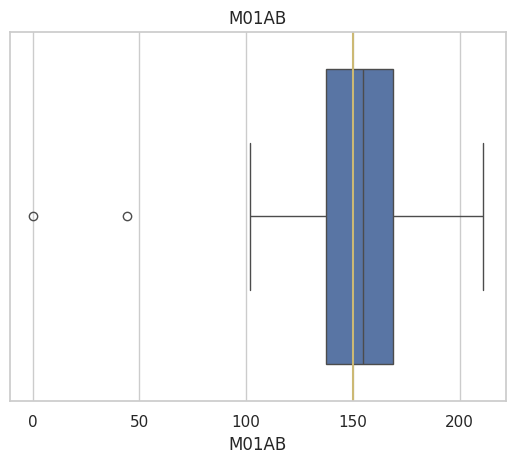

In [ ]:
#BOXPLOT
sns.set(style="whitegrid")
sns.boxplot(x=df['M01AB'])
plt.title('M01AB')
plt.axvline(df['M01AB'].mean(),c='y')

#Nuestros valores para este farmaco se concentran en un rango de los 130-170, con rangos atípicos en el rango de los 0-50
#Mediana se centra cerca de los 150, que se corrobora con el valor obtenido de la mediana: 154.6350

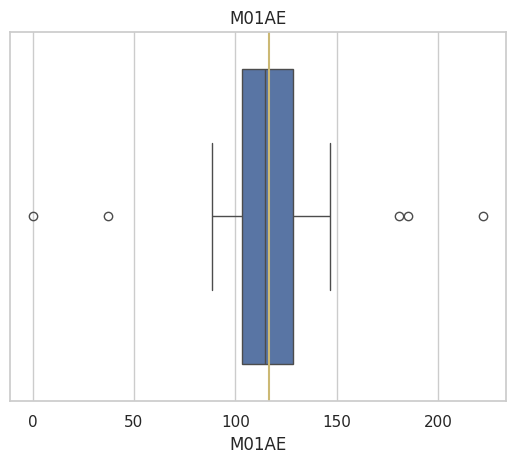

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df['M01AE'])
plt.title('M01AE')
plt.axvline(df['M01AE'].mean(),c='y')

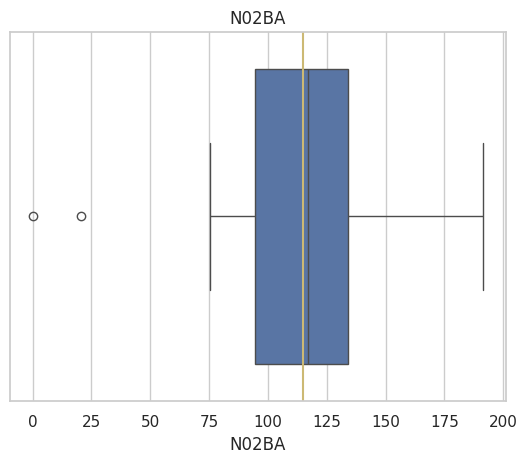

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df['N02BA'])
plt.title('N02BA')
plt.axvline(df['N02BA'].mean(),c='y')

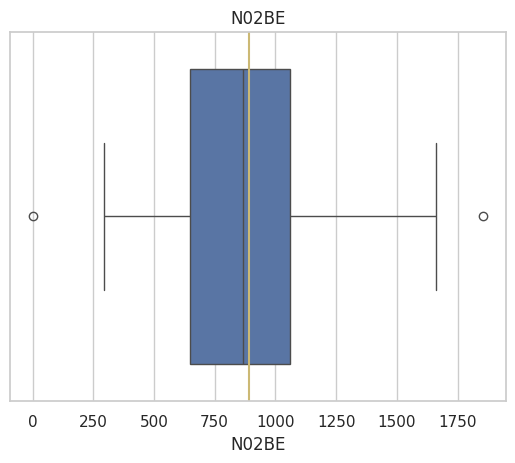

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df['N02BE'])
plt.title('N02BE')
plt.axvline(df['N02BE'].mean(),c='y')

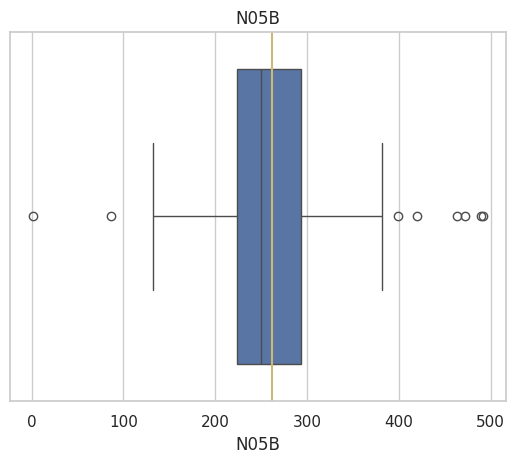

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df['N05B'])
plt.title('N05B')
plt.axvline(df['N05B'].mean(),c='y')

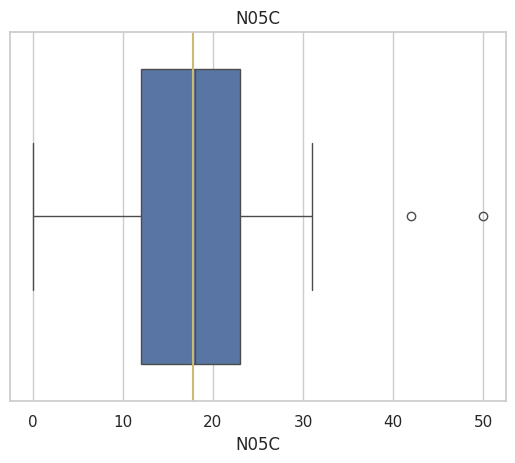

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df['N05C'])
plt.title('N05C')
plt.axvline(df['N05C'].mean(),c='y')

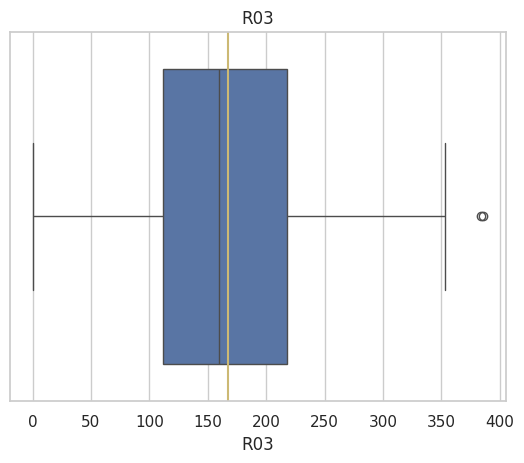

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df['R03'])
plt.title('R03')
plt.axvline(df['R03'].mean(),c='y')

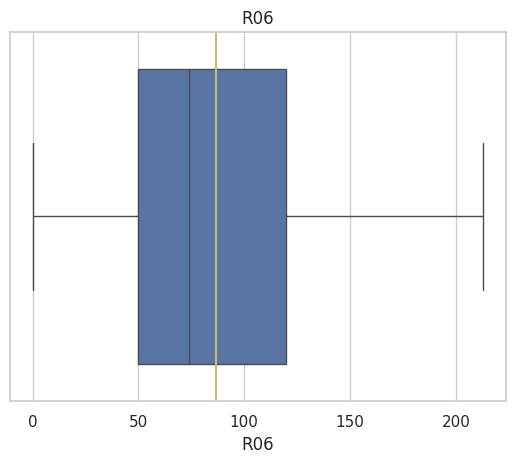

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df['R06'])
plt.title('R06')
plt.axvline(df['R06'].mean(),c='y')
#linea gris representa la media

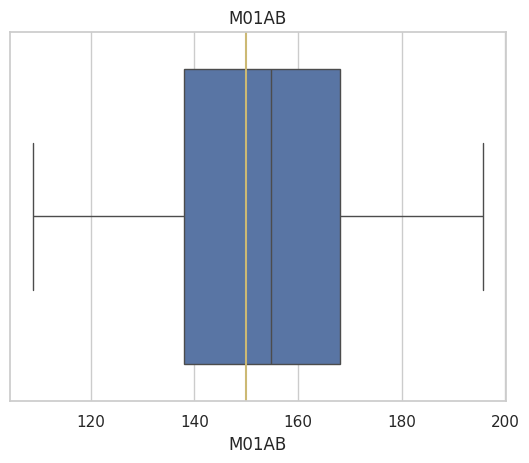

In [ ]:
#Rango Intercuartílico y Valores atípicos
#Eliminar valores atípicos
Q1=df['M01AB'].quantile(0.25)
Q3=df['M01AB'].quantile(0.75)
IQR= Q3 - Q1
filtro_inferior =df['M01AB']> df['M01AB'].quantile(0.25) - (IQR + 1.5)
filtro_superior =df['M01AB']< df['M01AB'].quantile(0.75) + (IQR + 1.5)
df_filtrado= df[filtro_inferior & filtro_superior]
sns.boxplot(df_filtrado['M01AB'], orient='h')
plt.title('M01AB')
plt.axvline(df['M01AB'].mean(),c='y')

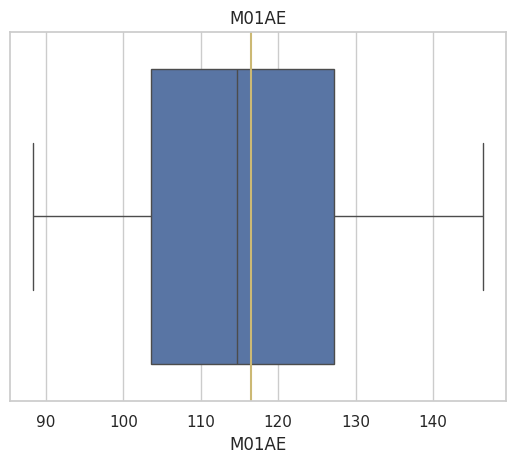

In [ ]:
Q1=df['M01AE'].quantile(0.25)
Q3=df['M01AE'].quantile(0.75)
IQR= Q3 - Q1
filtro_inferior =df['M01AE']> df['M01AE'].quantile(0.25) - (IQR + 1.5)
filtro_superior =df['M01AE']< df['M01AE'].quantile(0.75) + (IQR + 1.5)
df_filtrado= df[filtro_inferior & filtro_superior]
sns.boxplot(df_filtrado['M01AE'], orient='h')
plt.title('M01AE')
plt.axvline(df['M01AE'].mean(),c='y')

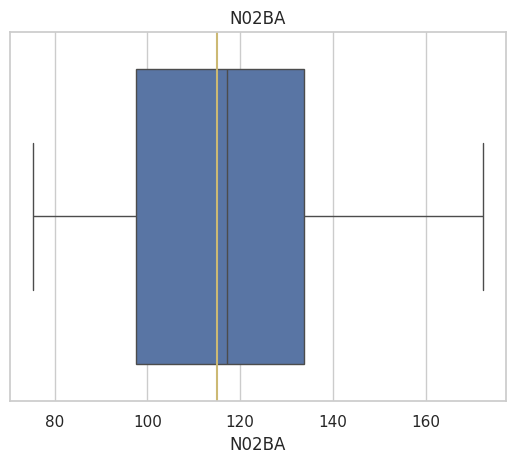

In [ ]:
Q1=df['N02BA'].quantile(0.25)
Q3=df['N02BA'].quantile(0.75)
IQR= Q3 - Q1
filtro_inferior =df['N02BA']> df['N02BA'].quantile(0.25) - (IQR + 1.5)
filtro_superior =df['N02BA']< df['N02BA'].quantile(0.75) + (IQR + 1.5)
df_filtrado= df[filtro_inferior & filtro_superior]
sns.boxplot(df_filtrado['N02BA'], orient='h')
plt.title('N02BA')
plt.axvline(df['N02BA'].mean(),c='y')

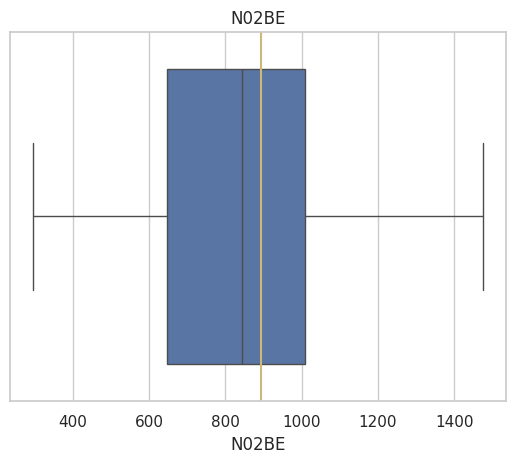

In [ ]:
Q1=df['N02BE'].quantile(0.25)
Q3=df['N02BE'].quantile(0.75)
IQR= Q3 - Q1
filtro_inferior =df['N02BE']> df['N02BE'].quantile(0.25) - (IQR + 1.5)
filtro_superior =df['N02BE']< df['N02BE'].quantile(0.75) + (IQR + 1.5)
df_filtrado= df[filtro_inferior & filtro_superior]
sns.boxplot(df_filtrado['N02BE'], orient='h')
plt.title('N02BE')
plt.axvline(df['N02BE'].mean(),c='y')

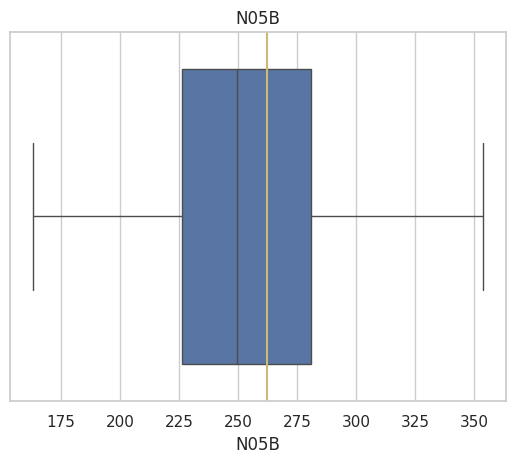

In [ ]:
Q1=df['N05B'].quantile(0.25)
Q3=df['N05B'].quantile(0.75)
IQR= Q3 - Q1
filtro_inferior =df['N05B']> df['N05B'].quantile(0.25) - (IQR + 1.5)
filtro_superior =df['N05B']< df['N05B'].quantile(0.75) + (IQR + 1.5)
df_filtrado= df[filtro_inferior & filtro_superior]
sns.boxplot(df_filtrado['N05B'], orient='h')
plt.title('N05B')
plt.axvline(df['N05B'].mean(),c='y')

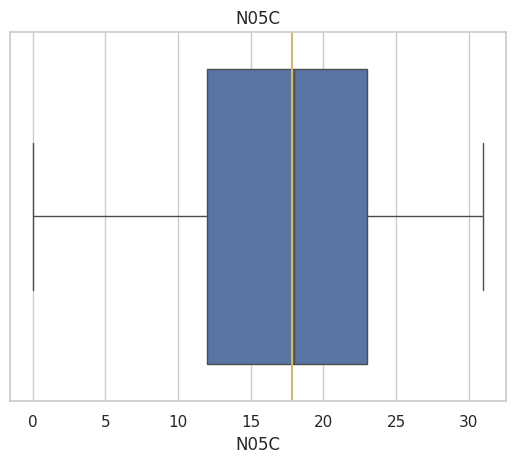

In [ ]:
Q1=df['N05C'].quantile(0.25)
Q3=df['N05C'].quantile(0.75)
IQR= Q3 - Q1
filtro_inferior =df['N05C']> df['N05C'].quantile(0.25) - (IQR + 1.5)
filtro_superior =df['N05C']< df['N05C'].quantile(0.75) + (IQR + 1.5)
df_filtrado= df[filtro_inferior & filtro_superior]
sns.boxplot(df_filtrado['N05C'], orient='h')
plt.title('N05C')
plt.axvline(df['N05C'].mean(),c='y')

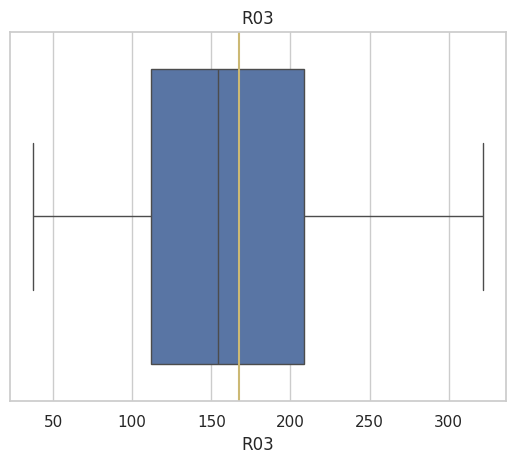

In [ ]:
Q1=df['R03'].quantile(0.25)
Q3=df['R03'].quantile(0.75)
IQR= Q3 - Q1
filtro_inferior =df['R03']> df['R03'].quantile(0.25) - (IQR + 1.5)
filtro_superior =df['R03']< df['R03'].quantile(0.75) + (IQR + 1.5)
df_filtrado= df[filtro_inferior & filtro_superior]
sns.boxplot(df_filtrado['R03'], orient='h')
plt.title('R03')
plt.axvline(df['R03'].mean(),c='y')

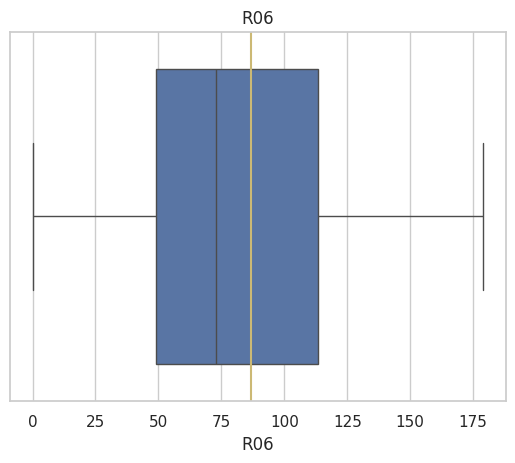

In [ ]:
Q1=df['R06'].quantile(0.25)
Q3=df['R06'].quantile(0.75)
IQR= Q3 - Q1
filtro_inferior =df['R06']> df['R06'].quantile(0.25) - (IQR + 1.5)
filtro_superior =df['R06']< df['R06'].quantile(0.75) + (IQR + 1.5)
df_filtrado= df[filtro_inferior & filtro_superior]
sns.boxplot(df_filtrado['R06'], orient='h')
plt.title('R06')
plt.axvline(df['R06'].mean(),c='y')

En los histogramas en todos se coloco la estimación de densidad kernel sin embargo se trabajo sobre los valores reales y no tomando el total como 1, lo cual en estos casos es lo más correcto pero debido a que como no son variables categoricas lo que más se buscaba resaltar era la cantidad real por ello se manejo de esta forma, nos percatamos hasta el final

Curtosis: 7.209981721838828
Asimetria: -1.9636015401456492


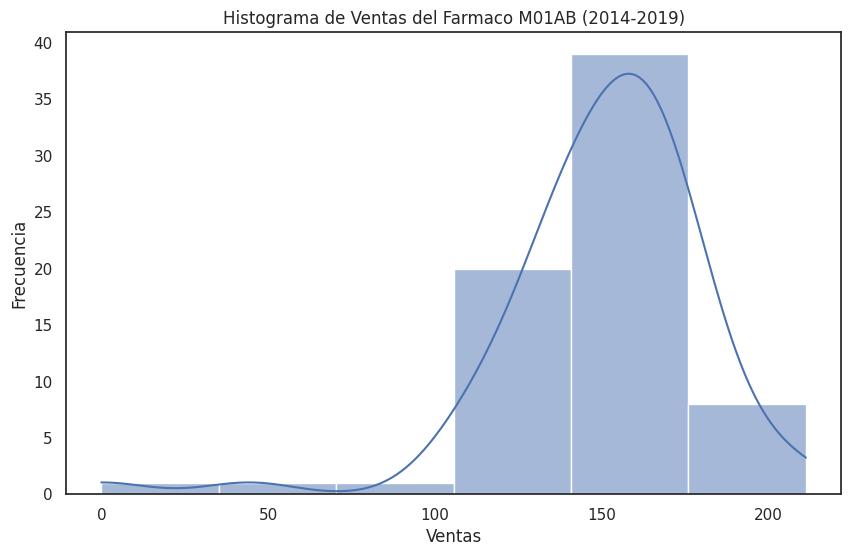

In [ ]:
#Elaboración de histogramas utilizando Seaborn
#Configurando el estilo de Seaborn
sns.set(style='white')
#Creando el histograma
plt.figure(figsize=(10,6))
sns.histplot(df['M01AB'],kde=True, bins=6, stat='count')
#Confugirando títulos y etiquetas
plt.title('Histograma de Ventas del Farmaco M01AB (2014-2019)')
plt.ylabel('Frecuencia')
plt.xlabel('Ventas')

#Interpretación del histograma utilizando conceptos de asimetría y curtosis
M01AB= df['M01AB']
print(f'Curtosis: {kurtosis(M01AB)}')
print(f'Asimetria: {skew(M01AB)}')
#Asimetría Negativa, la cola de la distribución se extiende más hacia la izquierda.
#La mayoría de los datos se agrupan hacia el lado derecho.
#El valor de la Kurtosis es >0, por lo que los valores se centran principalmente en el lado izquierdo, con una

Curtosis: 6.598770064408058
Asimetria: -0.20657326942234808


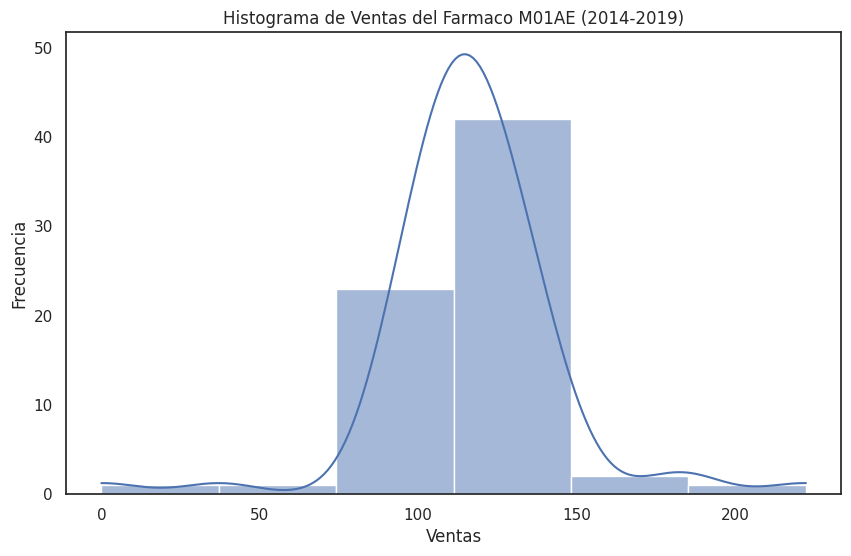

In [ ]:
#Elaboración de histogramas utilizando Seaborn
#Configurando el estilo de Seaborn
sns.set(style='white')
#Creando el histograma
plt.figure(figsize=(10,6))
sns.histplot(df['M01AE'],kde=True, bins=6, stat='count')
#Confugirando títulos y etiquetas
plt.title('Histograma de Ventas del Farmaco M01AE (2014-2019)')
plt.ylabel('Frecuencia')
plt.xlabel('Ventas')

#Interpretación del histograma utilizando conceptos de asimetría y curtosis
M01AE= df['M01AE']
print(f'Curtosis: {kurtosis(M01AE)}')
print(f'Asimetria: {skew(M01AE)}')

Curtosis: 2.299215718726642
Asimetria: -0.7062836925521726


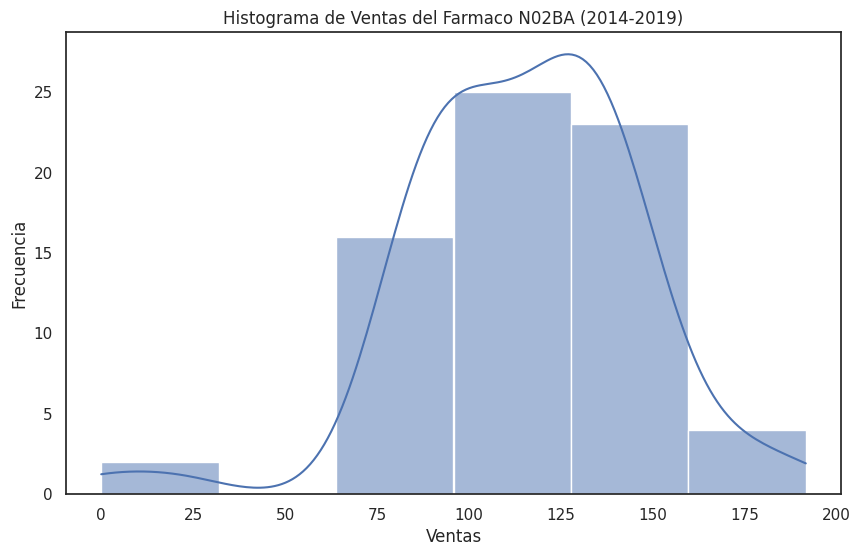

In [ ]:
#Elaboración de histogramas utilizando Seaborn
#Configurando el estilo de Seaborn
sns.set(style='white')
#Creando el histograma
plt.figure(figsize=(10,6))
sns.histplot(df['N02BA'],kde=True, bins=6, stat='count')
#Confugirando títulos y etiquetas
plt.title('Histograma de Ventas del Farmaco N02BA (2014-2019)')
plt.ylabel('Frecuencia')
plt.xlabel('Ventas')

#Interpretación del histograma utilizando conceptos de asimetría y curtosis
N02BA= df['N02BA']
print(f'Curtosis: {kurtosis(N02BA)}')
print(f'Asimetria: {skew(N02BA)}')

Curtosis: 0.5785815975859245
Asimetria: 0.5082457570055428


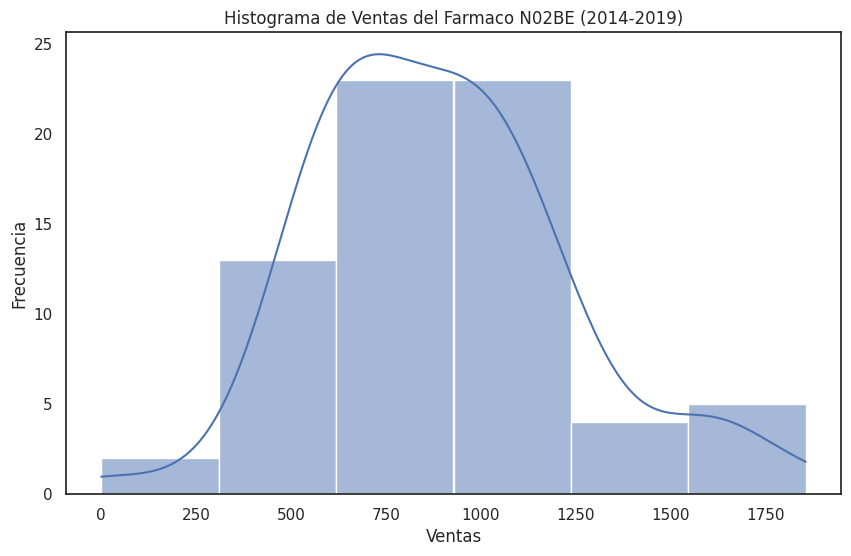

In [ ]:
#Elaboración de histogramas utilizando Seaborn
#Configurando el estilo de Seaborn
sns.set(style='white')
#Creando el histograma
plt.figure(figsize=(10,6))
sns.histplot(df['N02BE'],kde=True, bins=6, stat='count')
#Confugirando títulos y etiquetas
plt.title('Histograma de Ventas del Farmaco N02BE (2014-2019)')
plt.ylabel('Frecuencia')
plt.xlabel('Ventas')

#Interpretación del histograma utilizando conceptos de asimetría y curtosis
N02BE= df['N02BE']
print(f'Curtosis: {kurtosis(N02BE)}')
print(f'Asimetria: {skew(N02BE)}')

Curtosis: 1.7741006799915704
Asimetria: 0.4592141850254572


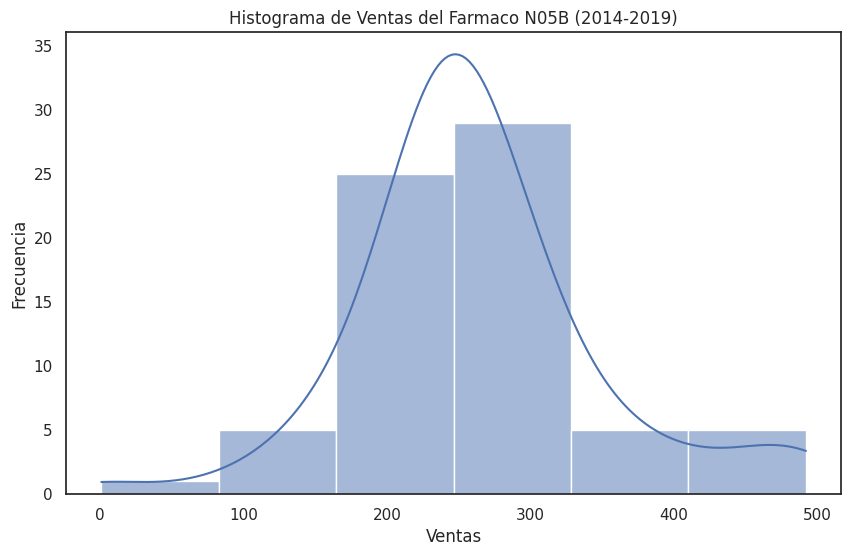

In [ ]:
#Elaboración de histogramas utilizando Seaborn
#Configurando el estilo de Seaborn
sns.set(style='white')
#Creando el histograma
plt.figure(figsize=(10,6))
sns.histplot(df['N05B'],kde=True, bins=6, stat='count')
#Confugirando títulos y etiquetas
plt.title('Histograma de Ventas del Farmaco N05B (2014-2019)')
plt.ylabel('Frecuencia')
plt.xlabel('Ventas')

#Interpretación del histograma utilizando conceptos de asimetría y curtosis
N05B= df['N05B']
print(f'Curtosis: {kurtosis(N05B)}')
print(f'Asimetria: {skew(N05B)}')

Curtosis: 2.079300714174104
Asimetria: 0.8914206887008358


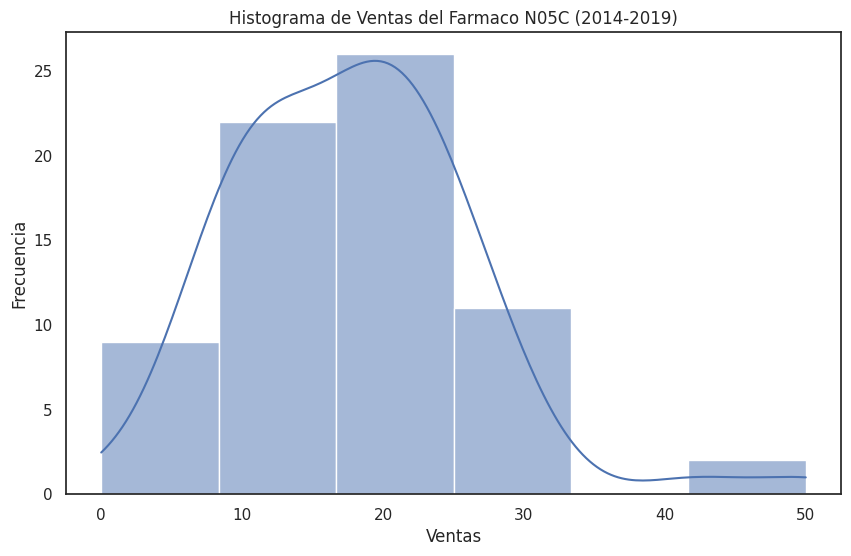

In [ ]:
#Elaboración de histogramas utilizando Seaborn
#Configurando el estilo de Seaborn
sns.set(style='white')
#Creando el histograma
plt.figure(figsize=(10,6))
sns.histplot(df['N05C'],kde=True, bins=6, stat='count')
#Confugirando títulos y etiquetas
plt.title('Histograma de Ventas del Farmaco N05C (2014-2019)')
plt.ylabel('Frecuencia')
plt.xlabel('Ventas')

#Interpretación del histograma utilizando conceptos de asimetría y curtosis
N05C= df['N05C']
print(f'Curtosis: {kurtosis(N05C)}')
print(f'Asimetria: {skew(N05C)}')

Curtosis: 0.16263042280526108
Asimetria: 0.5581909015764865


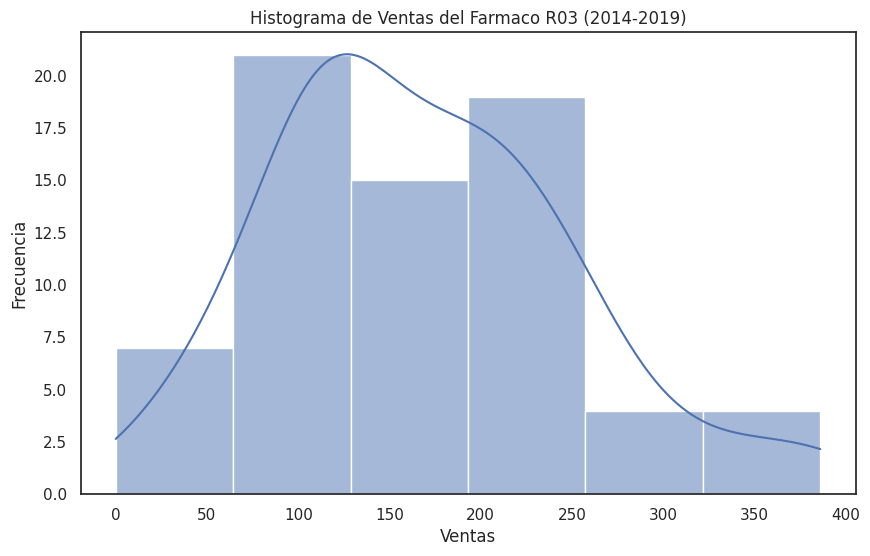

In [ ]:
#Elaboración de histogramas utilizando Seaborn
#Configurando el estilo de Seaborn
sns.set(style='white')
#Creando el histograma
plt.figure(figsize=(10,6))
sns.histplot(df['R03'],kde=True, bins=6, stat='count')
#Confugirando títulos y etiquetas
plt.title('Histograma de Ventas del Farmaco R03 (2014-2019)')
plt.ylabel('Frecuencia')
plt.xlabel('Ventas')

#Interpretación del histograma utilizando conceptos de asimetría y curtosis
R03= df['R03']
print(f'Curtosis: {kurtosis(R03)}')
print(f'Asimetria: {skew(R03)}')

Curtosis: -0.14993560220817326
Asimetria: 0.6770008347299641


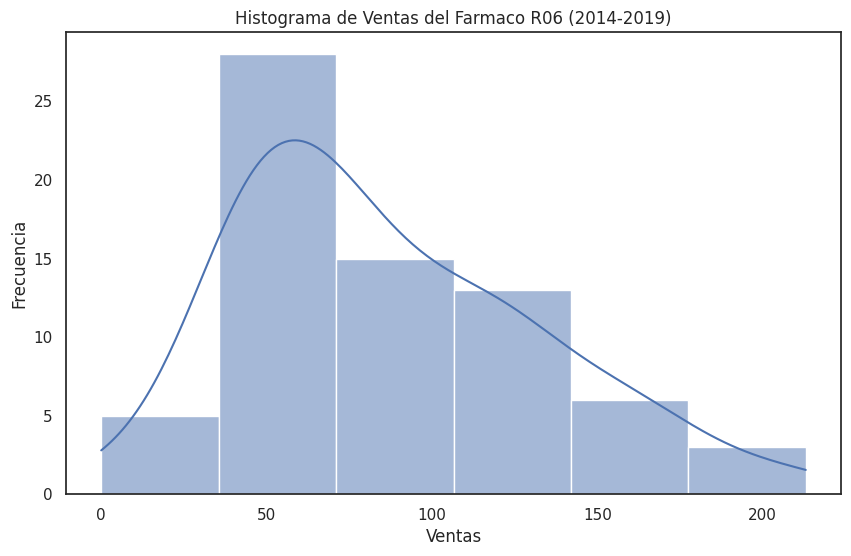

In [ ]:
#Elaboración de histogramas utilizando Seaborn
#Configurando el estilo de Seaborn
sns.set(style='white')
#Creando el histograma
plt.figure(figsize=(10,6))
sns.histplot(df['R06'],kde=True, bins=6, stat='count')
#Confugirando títulos y etiquetas
plt.title('Histograma de Ventas del Farmaco R06 (2014-2019)')
plt.ylabel('Frecuencia')
plt.xlabel('Ventas')

#Interpretación del histograma utilizando conceptos de asimetría y curtosis
R06= df['R06']
print(f'Curtosis: {kurtosis(R06)}')
print(f'Asimetria: {skew(R06)}')

## **Exploración de variables categóricas y análisis multivariable (Ana)**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import numpy as np
from scipy.stats import trim_mean
from scipy.stats import skew, kurtosis

La idea aqui es quitar los guiones de la columna de fechas para poder manejar la informacion de una manera mas sencilla y sin caracteres que nos estorben

In [ ]:
print("/content/drive/MyDrive/Proyecto_BEDU/salesmonthly.csv:")
print(df)

/content/drive/MyDrive/Proyecto_BEDU/salesmonthly.csv:
        datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03     R06
0  2014-01-31  127.69   99.090  152.100   878.030  354.0  50.0  112.0   48.20
1  2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.20
2  2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.40
3  2014-04-30  113.10   89.475  130.900   698.500  209.0  18.0   97.0   73.70
4  2014-05-31  101.79  119.933  132.100   628.780  270.0  23.0  107.0  123.70
..        ...     ...      ...      ...       ...    ...   ...    ...     ...
65 2019-06-30  151.54  101.627  103.200   610.000  193.0  25.0  142.0  156.04
66 2019-07-31  181.00  103.541   92.800   649.800  250.6  20.0  115.0  105.20
67 2019-08-31  181.91   88.269   84.200   518.100  237.0  26.0  145.0   97.30
68 2019-09-30  161.07  111.437   93.500   984.480  227.8  16.0  161.0  109.10
69 2019-10-31   44.37   37.300   20.650   295.150   86.0   7.0   37.0   11.13

[70 rows

In [ ]:
df['datum'] = pd.to_datetime(df['datum'])

In [ ]:
df['datum'] = df['datum'].dt.strftime('%Y%m%d')

In [ ]:
print("\nDataFrame después de quitar los guiones:")
print(df)


DataFrame después de quitar los guiones:
       datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03     R06
0   20140131  127.69   99.090  152.100   878.030  354.0  50.0  112.0   48.20
1   20140228  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.20
2   20140331  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.40
3   20140430  113.10   89.475  130.900   698.500  209.0  18.0   97.0   73.70
4   20140531  101.79  119.933  132.100   628.780  270.0  23.0  107.0  123.70
..       ...     ...      ...      ...       ...    ...   ...    ...     ...
65  20190630  151.54  101.627  103.200   610.000  193.0  25.0  142.0  156.04
66  20190731  181.00  103.541   92.800   649.800  250.6  20.0  115.0  105.20
67  20190831  181.91   88.269   84.200   518.100  237.0  26.0  145.0   97.30
68  20190930  161.07  111.437   93.500   984.480  227.8  16.0  161.0  109.10
69  20191031   44.37   37.300   20.650   295.150   86.0   7.0   37.0   11.13

[70 rows x 9 columns]


Al no tener datos categóricos, convertiremos los datos de fecha (tipo object) y trabajar con datos numericos.

ojito la idea era trabajar con todo numérico puesto que teniamos una columna tipo object, pero está por continuarse la idea.

# **Correlaciones y Regresión Lineal Simple**



###**Coeficiente de correlación de Pearson**

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('white')

In [ ]:
df.head() #Visualizamos las variables

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,20140131,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,20140228,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,20140331,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,20140430,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,20140531,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [ ]:
df.corr()

<ipython-input-71-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
M01AB,1.000000,0.597433,0.414754,0.421258,0.191444,0.079730,0.314224,0.307634
M01AE,0.597433,1.000000,0.557838,0.700727,0.398711,0.162850,0.444481,0.028693
N02BA,0.414754,0.557838,1.000000,0.546049,0.492957,0.273581,0.044137,-0.033713
N02BE,0.421258,0.700727,0.546049,1.000000,0.374160,0.211104,0.605476,-0.287455
N05B,0.191444,0.398711,0.492957,0.374160,1.000000,0.580570,0.125204,-0.056787
N05C,0.079730,0.162850,0.273581,0.211104,0.580570,1.000000,0.218196,-0.014792
R03,0.314224,0.444481,0.044137,0.605476,0.125204,0.218196,1.000000,0.000135
R06,0.307634,0.028693,-0.033713,-0.287455,-0.056787,-0.014792,0.000135,1.000000


<ipython-input-72-16a4cfe2aaab>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);


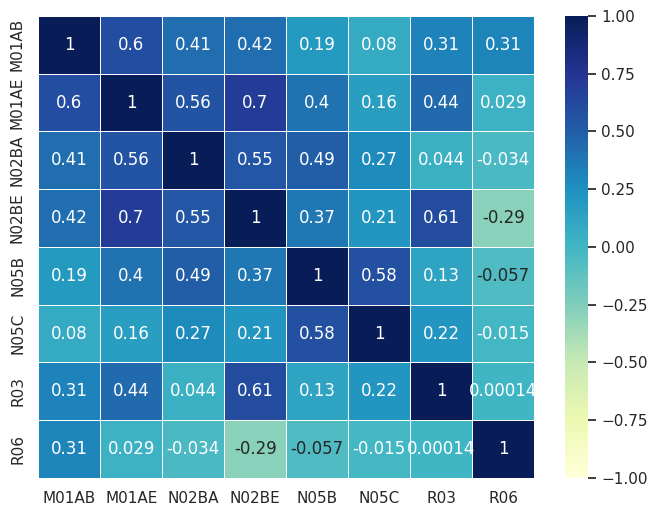

In [ ]:
#Hacemos un mapa de calor para poder visualizar la matriz y que sea más fácil de interpretar
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
mask

<ipython-input-73-be371d7477a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))


array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

<ipython-input-74-4ad990a5e612>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)


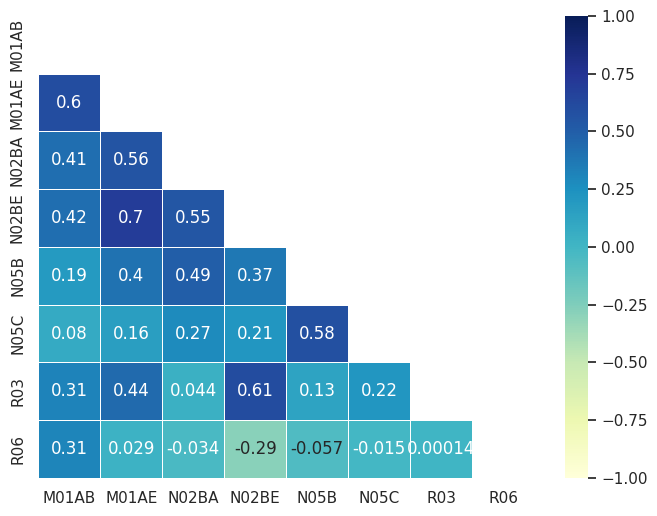

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)
plt.show()

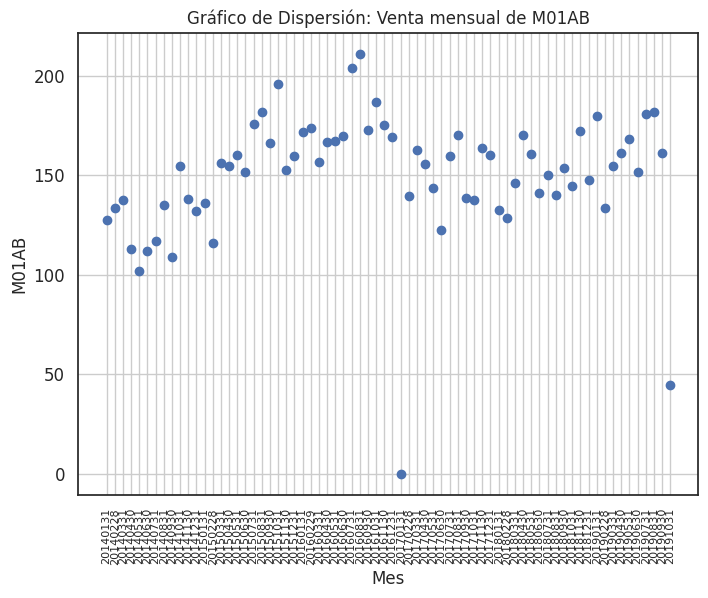

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['datum'], df['M01AB'])
plt.xlabel('Mes')
plt.xticks(rotation=90)
plt.ylabel('M01AB')
plt.xticks(fontsize=8)
plt.yticks(fontsize=12)
plt.title('Gráfico de Dispersión: Venta mensual de M01AB')
plt.grid(True)
plt.show()


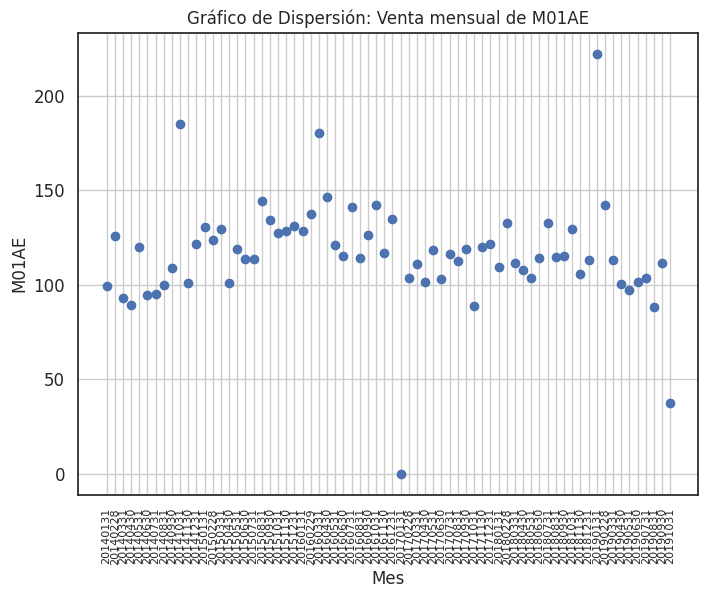

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['datum'], df['M01AE'])
plt.xlabel('Mes')
plt.xticks(rotation=90)
plt.ylabel('M01AE')
plt.xticks(fontsize=8)
plt.yticks(fontsize=12)
plt.title('Gráfico de Dispersión: Venta mensual de M01AE')
plt.grid(True)
plt.show()


###**Regresión lineal**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
fechas = df['datum']
M01AB = df['M01AB']

In [ ]:
lr.fit(fechas.to_frame(), M01AB)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)



LinearRegression()

In [ ]:
M01AB_predict = lr.predict(fechas.to_frame())

In [ ]:
import seaborn as sns
#print(sns.scatterplot.__doc__)

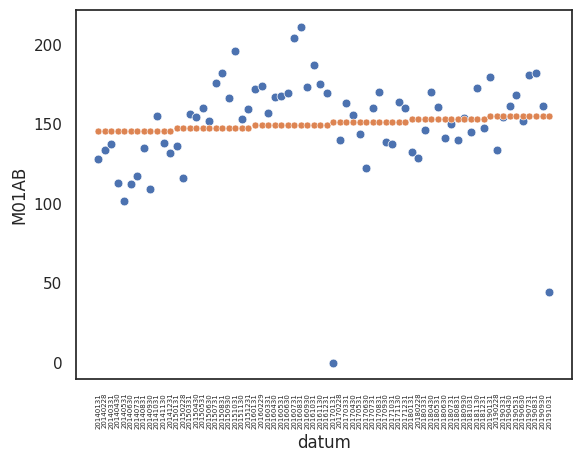

In [ ]:
#graficamos

sns.scatterplot(x=fechas, y=M01AB, s=40);
sns.scatterplot(x=fechas, y=M01AB_predict, s=25);
plt.xticks(fontsize=5);
plt.xticks(rotation=90);

#Naranja son los predecidos, los normales son azul.
#La siguiente gráfica muestra las ventas mensuales del medicamento M01AB
#durante el periodo 2014-2019, junto a su respectiva predicción en color naranja.

#NOTA IMPORTANTE
#debido a la gran cantidad de datos, se trabajarán gráficos para cada uno de los años
#dentro del periodo

In [ ]:
##INTENTOS PREVIOS#####
#modelo = LinearRegression()

In [ ]:
#modelo.fit(fechas.values.reshape(-1, 1), M01AB)
#print("Coeficiente (pendiente):", modelo.coef_[0])
#print("Intersección:", modelo.intercept_)

Coeficiente (pendiente): 0.00018704759917586756
Intersección: -3621.8138323755234


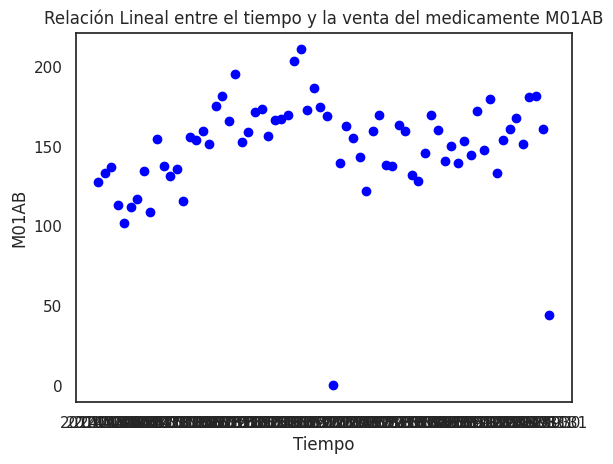

In [ ]:
#import matplotlib.pyplot as plt
#plt.scatter(fechas, M01AB, color='blue')
#plt.xlabel('Tiempo')
#plt.ylabel('M01AB')
#plt.title('Relación lineal entre el tiempo y la venta del medicamente M01AB')
#plt.show()


## **Distribuciones Muestrales y técnicas de evaluación de modelos (Ana)**

## **Visualización de datos avanzada(Fernanda)**

## **Pruebas A/B y Procesamiento de Lenguaje Natural(Olga)**
---

In [ ]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,20140131,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,20140228,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,20140331,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,20140430,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,20140531,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


## **Introducción a Machine Learning: clasificación no supervisada y supervisada(Guadalupe)**